In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Paths
source_dirs = [
    '/content/drive/MyDrive/Final Dataset/Train/Cancerous',
    '/content/drive/MyDrive/Final Dataset/Train/Non Cancerous'
]

target_dir = '/content/Train'
os.makedirs(target_dir, exist_ok=True)

# Merge all subclass folders into target_dir
for category_path in source_dirs:
    for subclass in os.listdir(category_path):
        subclass_path = os.path.join(category_path, subclass)
        dest_path = os.path.join(target_dir, subclass)

        # Create target folder if it doesn't exist
        os.makedirs(dest_path, exist_ok=True)

        # Copy all image files
        for img_file in os.listdir(subclass_path):
            src_file = os.path.join(subclass_path, img_file)
            dst_file = os.path.join(dest_path, img_file)

            # Handle duplicate names
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(img_file)
                dst_file = os.path.join(dest_path, f"{base}_copy{ext}")

            shutil.copy2(src_file, dst_file)

print("✅ All classes combined successfully into:", target_dir)


✅ All classes combined successfully into: /content/Train


In [ ]:
# Paths
source_dirs = [
    '/content/drive/MyDrive/Final Dataset/Val/Cancerous',
    '/content/drive/MyDrive/Final Dataset/Val/Non Cancerous'
]

target_dir = '/content/Val'
os.makedirs(target_dir, exist_ok=True)

# Merge all subclass folders into target_dir
for category_path in source_dirs:
    for subclass in os.listdir(category_path):
        subclass_path = os.path.join(category_path, subclass)
        dest_path = os.path.join(target_dir, subclass)

        # Create target folder if it doesn't exist
        os.makedirs(dest_path, exist_ok=True)

        # Copy all image files
        for img_file in os.listdir(subclass_path):
            src_file = os.path.join(subclass_path, img_file)
            dst_file = os.path.join(dest_path, img_file)

            # Handle duplicate names
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(img_file)
                dst_file = os.path.join(dest_path, f"{base}_copy{ext}")

            shutil.copy2(src_file, dst_file)

print("✅ All classes combined successfully into:", target_dir)


✅ All classes combined successfully into: /content/Val


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Define augmenter
augmentor = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Source directory
source_dir = '/content/Train/Benign keratosis-like lesions'

# Augmented save directory
aug_dir = '/content/augmented/Benign keratosis-like lesions'
os.makedirs(aug_dir, exist_ok=True)

# Count of new images needed
current_images = len(os.listdir(source_dir))
# target = 8000
needed = 7500

# Augment loop
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
i = 0
while i < needed:
    for fname in image_files:
        img_path = os.path.join(source_dir, fname)
        img = load_img(img_path, target_size=(64,64))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in augmentor.flow(x, batch_size=1, save_to_dir=aug_dir,
                                     save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= needed:
                break
    if needed == 0:
        break


In [ ]:
# Source directory
source_dir = '/content/Train/Basal cell carcinoma'

# Augmented save directory
aug_dir = '/content/augmented/Basal cell carcinoma'
os.makedirs(aug_dir, exist_ok=True)

# Count of new images needed
current_images = len(os.listdir(source_dir))
target = 8000
needed = target - current_images

# Augment loop
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
i = 0
while i < needed:
    for fname in image_files:
        img_path = os.path.join(source_dir, fname)
        img = load_img(img_path, target_size=(64,64))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in augmentor.flow(x, batch_size=1, save_to_dir=aug_dir,
                                     save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= needed:
                break
    if needed == 0:
        break


In [ ]:
# Source directory
source_dir = '/content/Train/Dermatofibroma'

# Augmented save directory
aug_dir = '/content/augmented/Dermatofibroma'
os.makedirs(aug_dir, exist_ok=True)

# Count of new images needed
current_images = len(os.listdir(source_dir))
target = 8000
needed = target - current_images

# Augment loop
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
i = 0
while i < needed:
    for fname in image_files:
        img_path = os.path.join(source_dir, fname)
        img = load_img(img_path, target_size=(64,64))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in augmentor.flow(x, batch_size=1, save_to_dir=aug_dir,
                                     save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= needed:
                break
    if needed == 0:
        break


In [ ]:
# Source directory
source_dir = '/content/Train/Melanoma'

# Augmented save directory
aug_dir = '/content/augmented/Melanoma'
os.makedirs(aug_dir, exist_ok=True)

# Count of new images needed
current_images = len(os.listdir(source_dir))
target = 8000
needed = target - current_images

# Augment loop
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
i = 0
while i < needed:
    for fname in image_files:
        img_path = os.path.join(source_dir, fname)
        img = load_img(img_path, target_size=(64,64))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in augmentor.flow(x, batch_size=1, save_to_dir=aug_dir,
                                     save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= needed:
                break
    if needed == 0:
        break


In [ ]:
# Source directory
source_dir = '/content/Train/Squamous cell carcinoma'

# Augmented save directory
aug_dir = '/content/augmented/Squamous cell carcinoma'
os.makedirs(aug_dir, exist_ok=True)

# Count of new images needed
current_images = len(os.listdir(source_dir))
target = 8000
needed = target - current_images

# Augment loop
image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
i = 0
while i < needed:
    for fname in image_files:
        img_path = os.path.join(source_dir, fname)
        img = load_img(img_path, target_size=(64,64))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in augmentor.flow(x, batch_size=1, save_to_dir=aug_dir,
                                     save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= needed:
                break
    if needed == 0:
        break


In [ ]:
import os
import shutil

# Define the base paths
original_base = '/content/Train'
augmented_base = '/content/augmented'

# Loop through each class folder in augmented directory
for class_name in os.listdir(augmented_base):
    aug_class_dir = os.path.join(augmented_base, class_name)
    orig_class_dir = os.path.join(original_base, class_name)

    if not os.path.exists(orig_class_dir):
        os.makedirs(orig_class_dir)

    # Move each file
    for file_name in os.listdir(aug_class_dir):
        src_file = os.path.join(aug_class_dir, file_name)
        dst_file = os.path.join(orig_class_dir, file_name)

        if not os.path.exists(dst_file):  # avoid overwriting
            shutil.move(src_file, dst_file)

print("✅ All augmented images have been merged into original folders.")


✅ All augmented images have been merged into original folders.


In [ ]:
# Set the path to your dataset folder
data_dir = '/content/Train'

# List each class and count images
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        print(f"{class_name}: {num_images} images")


Dermatofibroma: 5681 images
Benign: 8742 images
Benign keratosis-like lesions: 7607 images
Squamous cell carcinoma: 5878 images
Melanoma: 8448 images
Melanocytic nevi: 8118 images
malignant: 8950 images
Basal cell carcinoma: 7629 images


In [ ]:
# generators
AUTOTUNE = tf.data.AUTOTUNE

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
).cache().prefetch(buffer_size=AUTOTUNE)

Found 61053 files belonging to 8 classes.
Found 14132 files belonging to 8 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(64,64,3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,645,192 (94.01 MB)

 Trainable params: 1,057,480 (4.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=Optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=validation_ds, callbacks=early_stop)

Epoch 1/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 275s 90ms/step - accuracy: 0.2308 - loss: 1.9154 - val_accuracy: 0.2528 - val_loss: 1.8167
Epoch 2/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 92s 19ms/step - accuracy: 0.4028 - loss: 1.5969 - val_accuracy: 0.3294 - val_loss: 1.6604
Epoch 3/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.4849 - loss: 1.4378 - val_accuracy: 0.3584 - val_loss: 1.5725
Epoch 4/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5249 - loss: 1.3524 - val_accuracy: 0.3614 - val_loss: 1.5718
Epoch 5/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5447 - loss: 1.2940 - val_accuracy: 0.3529 - val_loss: 1.5796
Epoch 6/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.5583 - loss: 1.2417 - val_accuracy: 0.3825 - val_loss: 1.5161
Epoch 7/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.5690 - loss: 1.2052 - val_accuracy: 0.3893 - val_loss: 1.5075
Epoch 8/100
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy:

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(validation_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4950 - loss: 1.3212
Test accuracy: 0.4943
Test loss: 1.3287


In [ ]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Train accuracy: {train_accuracy:.4f}") ;
print(f"Train loss: {train_loss:.4f}")

1908/1908 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6423 - loss: 0.9363
Train accuracy: 0.6423
Train loss: 0.9337


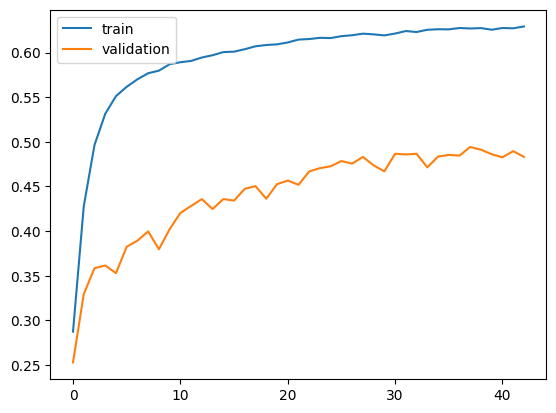

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

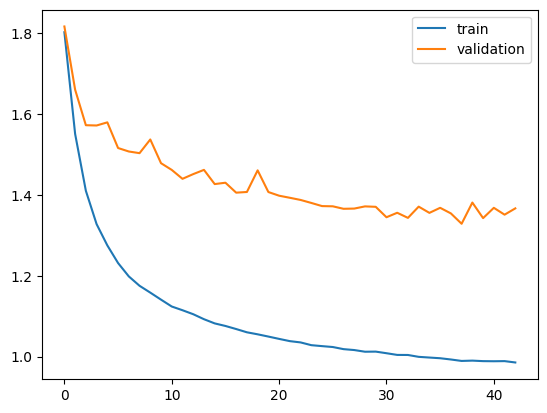

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()